# Import libraries and dataset  

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import lognorm
import statsmodels.api as sma
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [60]:
ingr = pd.read_csv('/data/foodboost/ingredients.csv')
nutr = pd.read_csv('/data/foodboost/nutritions.csv')
recp = pd.read_csv('/data/foodboost/recipes.csv')
tags = pd.read_csv('/data/foodboost/tags.csv')

In [61]:
nutr

,Unnamed: 0,recipe,nutrition,value
0,0,Kruidnoten met choco-discodip,energie,260 kcal
1,1,Kruidnoten met choco-discodip,koolhydraten,34 g
2,2,Kruidnoten met choco-discodip,waarvan suikers,22 g
3,3,Kruidnoten met choco-discodip,natrium,200 mg
4,4,Kruidnoten met choco-discodip,eiwit,3 g
...,...,...,...,...
58760,58760,Pittige truffels,waarvan verzadigd,0 g
58761,58761,Biefstuk met rodewijnsaus en ham,energie,360 kcal
58762,58762,Biefstuk met rodewijnsaus en ham,koolhydraten,2 g
58763,58763,Biefstuk met rodewijnsaus en ham,eiwit,28 g


In [62]:
valuelist = []

for value in nutr.value:
    if 'kcal' in value:
        valuelist.append(str(value[:-5]))
    elif 'mg' in value:
        valuelist.append(str(value[:-3]))
    elif 'g' in value:
        valuelist.append(str(value[:-2]))
        
nutr['value'] = valuelist
nutr

,Unnamed: 0,recipe,nutrition,value
0,0,Kruidnoten met choco-discodip,energie,260
1,1,Kruidnoten met choco-discodip,koolhydraten,34
2,2,Kruidnoten met choco-discodip,waarvan suikers,22
3,3,Kruidnoten met choco-discodip,natrium,200
4,4,Kruidnoten met choco-discodip,eiwit,3
...,...,...,...,...
58760,58760,Pittige truffels,waarvan verzadigd,0
58761,58761,Biefstuk met rodewijnsaus en ham,energie,360
58762,58762,Biefstuk met rodewijnsaus en ham,koolhydraten,2
58763,58763,Biefstuk met rodewijnsaus en ham,eiwit,28


# Make df with columns of all nutritions

In [63]:
df = nutr.pivot(index = 'recipe', columns = 'nutrition', values = 'value')
df

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
recipe,,,,,,,,
Andijviestamppot met gebakken salami,25,630,36,1875,41,7,NaN,17
Bietensoep met selderijroom,3,160,11,1160,11,5,NaN,5
Libanese wraps met appel-koolsalade,21,440,45,440,18,9,NaN,3
Plaattaart met gegrilde groenten en witte kaas,16,550,38,760,35,8,11,16
Sticky cauliflower (gegrilde bloemkoolroosjes) van Jord Althuizen,8,235,16,800,14,6,NaN,2
...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes met room,33,640,26,520,45,2,NaN,22
Zweedse vegaballetjes met aardappel &amp; broccoli,38,770,76,1320,31,17,NaN,10
Zwitserse kaasfondue,56,850,7,920,63,0,5,38


In [64]:
nutritions = ['eiwit','koolhydraten','vet','vezels','waarvan suikers','waarvan verzadigd']

for kolommen in nutritions:
    df[kolommen] = df[kolommen].fillna('0')
df

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
recipe,,,,,,,,
Andijviestamppot met gebakken salami,25,630,36,1875,41,7,0,17
Bietensoep met selderijroom,3,160,11,1160,11,5,0,5
Libanese wraps met appel-koolsalade,21,440,45,440,18,9,0,3
Plaattaart met gegrilde groenten en witte kaas,16,550,38,760,35,8,11,16
Sticky cauliflower (gegrilde bloemkoolroosjes) van Jord Althuizen,8,235,16,800,14,6,0,2
...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes met room,33,640,26,520,45,2,0,22
Zweedse vegaballetjes met aardappel &amp; broccoli,38,770,76,1320,31,17,0,10
Zwitserse kaasfondue,56,850,7,920,63,0,5,38


In [65]:
df.isnull().sum()

nutrition
eiwit                   0
energie                 0
koolhydraten            0
natrium              1404
vet                     0
vezels                  0
waarvan suikers         0
waarvan verzadigd       0
dtype: int64

In [66]:
df = df.astype(np.float64)
df

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
recipe,,,,,,,,
Andijviestamppot met gebakken salami,25.0,630.0,36.0,1875.0,41.0,7.0,0.0,17.0
Bietensoep met selderijroom,3.0,160.0,11.0,1160.0,11.0,5.0,0.0,5.0
Libanese wraps met appel-koolsalade,21.0,440.0,45.0,440.0,18.0,9.0,0.0,3.0
Plaattaart met gegrilde groenten en witte kaas,16.0,550.0,38.0,760.0,35.0,8.0,11.0,16.0
Sticky cauliflower (gegrilde bloemkoolroosjes) van Jord Althuizen,8.0,235.0,16.0,800.0,14.0,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes met room,33.0,640.0,26.0,520.0,45.0,2.0,0.0,22.0
Zweedse vegaballetjes met aardappel &amp; broccoli,38.0,770.0,76.0,1320.0,31.0,17.0,0.0,10.0
Zwitserse kaasfondue,56.0,850.0,7.0,920.0,63.0,0.0,5.0,38.0


# Create test and train dataset

In [67]:
df_train = df[:8000]
df_test = df[-706:]

In [68]:
df_train

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
recipe,,,,,,,,
Andijviestamppot met gebakken salami,25.0,630.0,36.0,1875.0,41.0,7.0,0.0,17.0
Bietensoep met selderijroom,3.0,160.0,11.0,1160.0,11.0,5.0,0.0,5.0
Libanese wraps met appel-koolsalade,21.0,440.0,45.0,440.0,18.0,9.0,0.0,3.0
Plaattaart met gegrilde groenten en witte kaas,16.0,550.0,38.0,760.0,35.0,8.0,11.0,16.0
Sticky cauliflower (gegrilde bloemkoolroosjes) van Jord Althuizen,8.0,235.0,16.0,800.0,14.0,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...
Verse worst met knolselderijsalade,30.0,500.0,14.0,800.0,34.0,10.0,4.0,10.0
Verse-kabeljauw-couscousverrassing uit de oven,31.0,345.0,48.0,120.0,31.0,7.0,0.0,2.0
Vesper,0.0,280.0,2.0,NaN,0.0,0.0,0.0,0.0


In [69]:
df_train.isnull().sum()

nutrition
eiwit                   0
energie                 0
koolhydraten            0
natrium              1291
vet                     0
vezels                  0
waarvan suikers         0
waarvan verzadigd       0
dtype: int64

In [70]:
df_test['y_pred'] = np.nan
df_test

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd,y_pred
recipe,,,,,,,,,
Vietnamese karamelzalm van Donal Skehan,34.0,490.0,24.0,680.0,28.0,3.0,0.0,4.0,NaN
Vietnamese komkommer,17.0,335.0,62.0,NaN,1.0,0.0,0.0,0.0,NaN
Vietnamese loempia's,6.0,160.0,15.0,320.0,8.0,1.0,3.0,2.0,NaN
Vietnamese loempia's met groente,10.0,500.0,38.0,NaN,33.0,0.0,0.0,0.0,NaN
Vietnamese noedelsalade met gemarineerde garnalen,22.0,475.0,33.0,580.0,27.0,6.0,0.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes met room,33.0,640.0,26.0,520.0,45.0,2.0,0.0,22.0,NaN
Zweedse vegaballetjes met aardappel &amp; broccoli,38.0,770.0,76.0,1320.0,31.0,17.0,0.0,10.0,NaN
Zwitserse kaasfondue,56.0,850.0,7.0,920.0,63.0,0.0,5.0,38.0,NaN


# Show all correlations on kcal

## Corrolation on energie
Based on the correlation, use: vet, eiwit, koolhydraten

In [71]:
dfcorr = df.corr().energie
dfcorr = dfcorr.sort_values(ascending = False)
dfcorr

nutrition
energie              1.000000
vet                  0.822935
eiwit                0.751385
koolhydraten         0.741164
waarvan verzadigd    0.519127
natrium              0.465432
vezels               0.143125
waarvan suikers      0.045882
Name: energie, dtype: float64

## Corrolation on vet
Eiwit is 0.55 and koolhydraten is 0.30, this is acceptable

In [72]:
dfcorr = df.corr().vet
dfcorr = dfcorr.sort_values(ascending = False)
dfcorr

nutrition
vet                  1.000000
energie              0.822935
waarvan verzadigd    0.644781
eiwit                0.559769
natrium              0.327347
koolhydraten         0.303026
vezels               0.092160
waarvan suikers     -0.018006
Name: vet, dtype: float64

## Corrolation on eiwit
Also all chosen variables are acceptable

In [73]:
dfcorr = df.corr().eiwit
dfcorr = dfcorr.sort_values(ascending = False)
dfcorr

nutrition
eiwit                1.000000
energie              0.751385
vet                  0.559769
natrium              0.496325
koolhydraten         0.433293
waarvan verzadigd    0.321100
vezels               0.118787
waarvan suikers     -0.079747
Name: eiwit, dtype: float64

## Corrolation on koolhydraten
Here too

In [74]:
dfcorr = df.corr().koolhydraten 
dfcorr = dfcorr.sort_values(ascending = False)
dfcorr

nutrition
koolhydraten         1.000000
energie              0.741164
eiwit                0.433293
natrium              0.341172
vet                  0.303026
waarvan verzadigd    0.188976
waarvan suikers      0.143648
vezels               0.119329
Name: koolhydraten, dtype: float64

# Make boxplots and analyse data

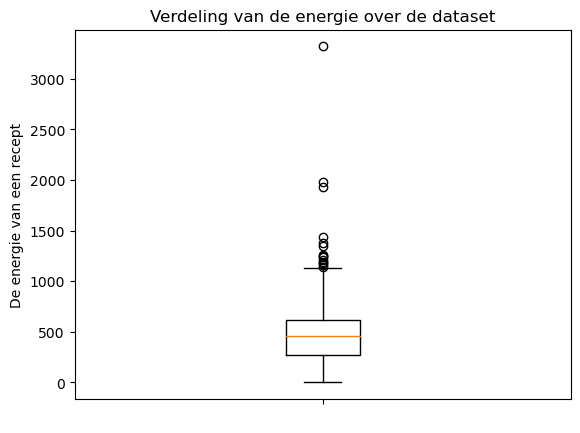

In [75]:
_ = plt.boxplot(df_train.energie)
_ = plt.title("Verdeling van de energie over de dataset")
_ = plt.ylabel("De energie van een recept")
_ = plt.xticks(color = 'w')

# Analyzing outliers

'Roggebrood met noten en bessen' could be divided by 10, becuase this sees a whole bread as 1 portion while the picture shows 10 slices of bread (aka 10 real life protions) could be obtained by the bread.

'Aardbeienjam maken' also calculates a whole batch. So I looked up how many grams a portion of it was, and that would be 30 grams according to https://www.voedingswaardetabel.nl/voedingswaarde/voedingsmiddel/?id=554&pp=1#prodgramsanchor. So I calculated with 30 grams. I also did this with the 'Ananas-gemberjam'

In [76]:
df_train[df_train['energie']>1500]

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
recipe,,,,,,,,
Aardbeienjam maken,4.0,1935.0,477.0,15.0,0.0,6.0,0.0,0.0
Ananas-gemberjam,2.0,1980.0,480.0,NaN,1.0,0.0,0.0,0.0
Roggebrood met noten en bessen,104.0,3320.0,430.0,2805.0,112.0,85.0,0.0,11.0


In [77]:
df_train.loc['Roggebrood met noten en bessen'] = df_train.loc['Roggebrood met noten en bessen']/10
df_train.loc['Roggebrood met noten en bessen']

nutrition
eiwit                 10.4
energie              332.0
koolhydraten          43.0
natrium              280.5
vet                   11.2
vezels                 8.5
waarvan suikers        0.0
waarvan verzadigd      1.1
Name: Roggebrood met noten en bessen, dtype: float64

In [78]:
df_train.loc['Ananas-gemberjam'] = df_train.loc['Ananas-gemberjam']/(500/30)
df_train.loc['Ananas-gemberjam']

nutrition
eiwit                  0.12
energie              118.80
koolhydraten          28.80
natrium                 NaN
vet                    0.06
vezels                 0.00
waarvan suikers        0.00
waarvan verzadigd      0.00
Name: Ananas-gemberjam, dtype: float64

In [79]:
df_train.loc['Aardbeienjam maken'] = df_train.loc['Aardbeienjam maken']/(500/30)
df_train.loc['Aardbeienjam maken']

nutrition
eiwit                  0.24
energie              116.10
koolhydraten          28.62
natrium                0.90
vet                    0.00
vezels                 0.36
waarvan suikers        0.00
waarvan verzadigd      0.00
Name: Aardbeienjam maken, dtype: float64

# Again make boxplots

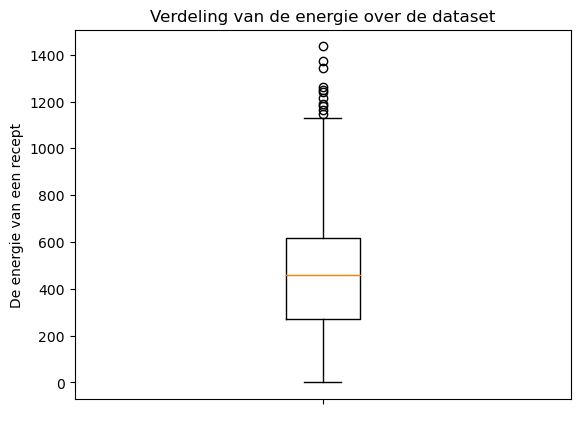

In [80]:
_ = plt.boxplot(df_train.energie)
_ = plt.title("Verdeling van de energie over de dataset")
_ = plt.ylabel("De energie van een recept")
_ = plt.xticks(color = 'w')

# See if all data is normally distributed

## Energie distribution

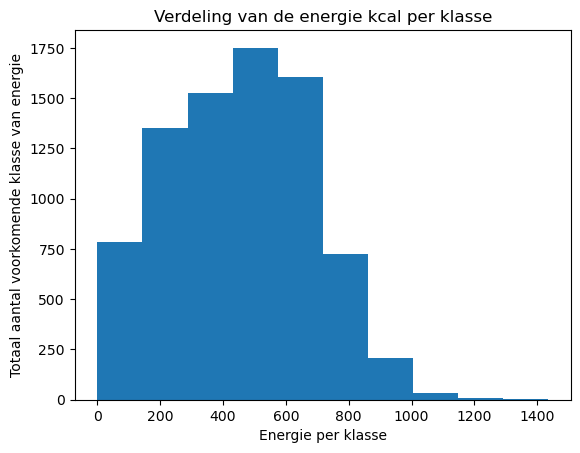

In [81]:
_ = plt.hist(df_train.energie)
_ = plt.title("Verdeling van de energie kcal per klasse")
_ = plt.ylabel("Totaal aantal voorkomende klasse van energie")
_ = plt.xlabel("Energie per klasse")

# QQ plots energie

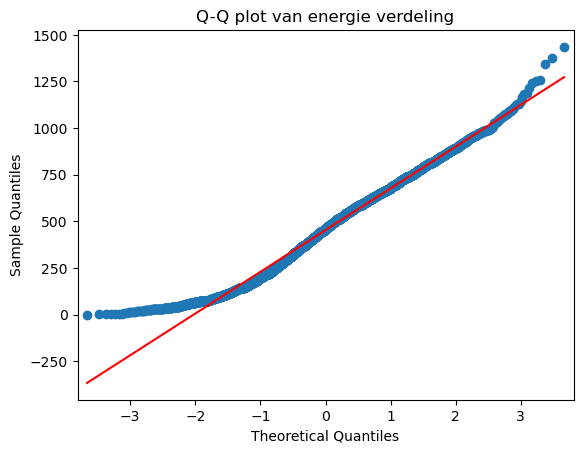

In [82]:
data = df_train.energie.values
fig = sma.qqplot(data, line = 'r')
fig = plt.title("Q-Q plot van energie verdeling")
plt.show()

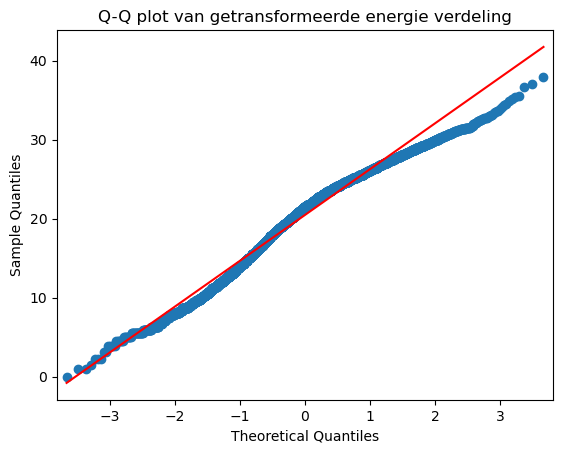

In [83]:
data = np.sqrt(df_train.energie.values)
fig = sma.qqplot(data, line = 's')
fig = plt.title("Q-Q plot van getransformeerde energie verdeling")
plt.show()

In [84]:
df_train.energie = np.sqrt(df_train.energie.values)

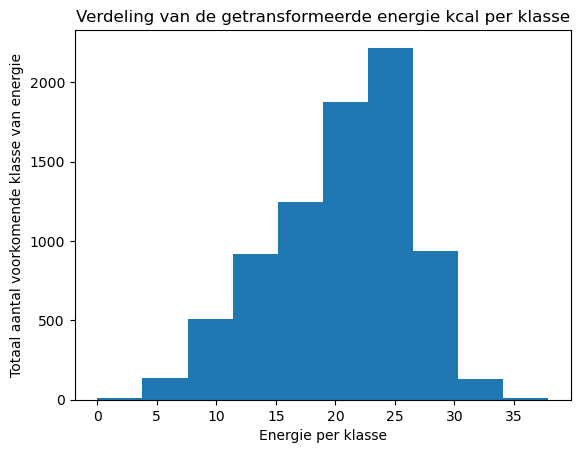

In [85]:
_ = plt.hist(df_train.energie)
_ = plt.title("Verdeling van de getransformeerde energie kcal per klasse")
_ = plt.ylabel("Totaal aantal voorkomende klasse van energie")
_ = plt.xlabel("Energie per klasse")

## Vet distribution

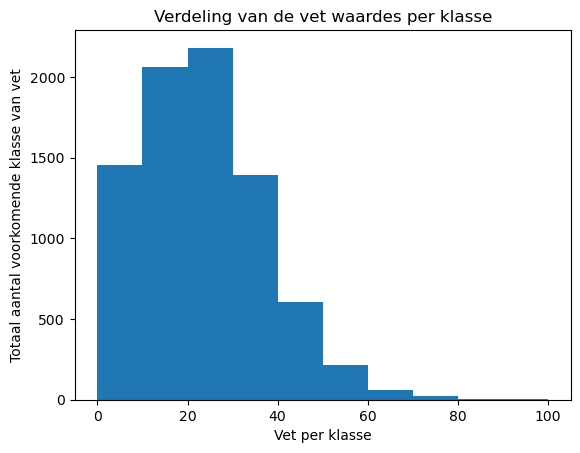

In [86]:
_ = plt.hist(df_train.vet)
_ = plt.title("Verdeling van de vet waardes per klasse")
_ = plt.ylabel("Totaal aantal voorkomende klasse van vet")
_ = plt.xlabel("Vet per klasse")

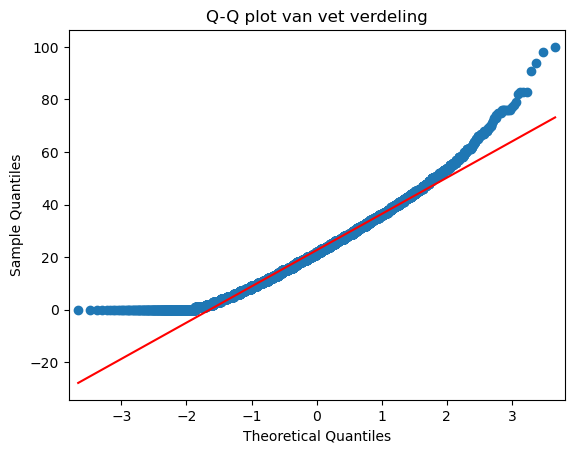

In [87]:
data = df_train.vet.values
fig = sma.qqplot(data, line = 's')
fig = plt.title("Q-Q plot van vet verdeling")
plt.show()

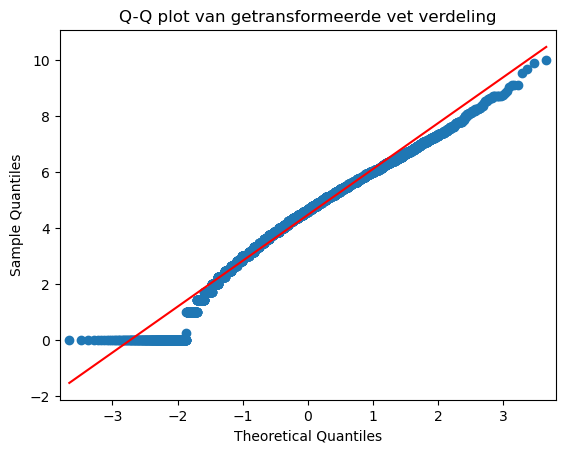

In [88]:
data = np.sqrt(df_train.vet.values)
fig = sma.qqplot(data, line = 's')
fig = plt.title("Q-Q plot van getransformeerde vet verdeling")
plt.show()

In [89]:
df_train.vet = np.sqrt(df_train.vet.values)

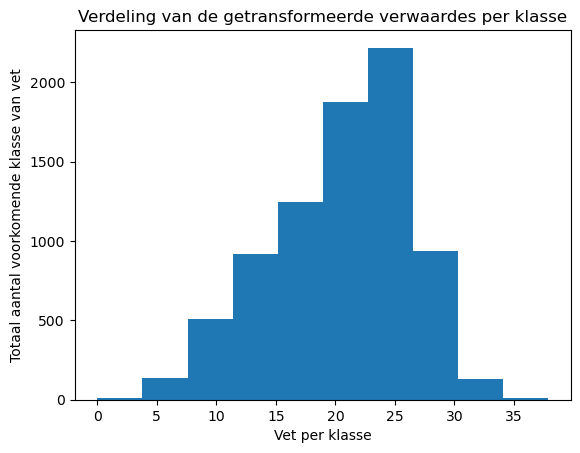

In [90]:
_ = plt.hist(df_train.energie)
_ = plt.title("Verdeling van de getransformeerde verwaardes per klasse")
_ = plt.ylabel("Totaal aantal voorkomende klasse van vet")
_ = plt.xlabel("Vet per klasse")

## Eiwit distribution

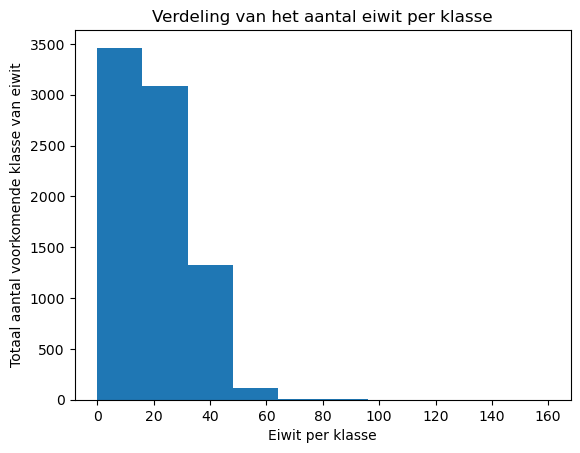

In [91]:
_ = plt.hist(df_train.eiwit)
_ = plt.title("Verdeling van het aantal eiwit per klasse")
_ = plt.ylabel("Totaal aantal voorkomende klasse van eiwit")
_ = plt.xlabel("Eiwit per klasse")

In [92]:
df_train.eiwit = np.sqrt(df_train.eiwit.values)

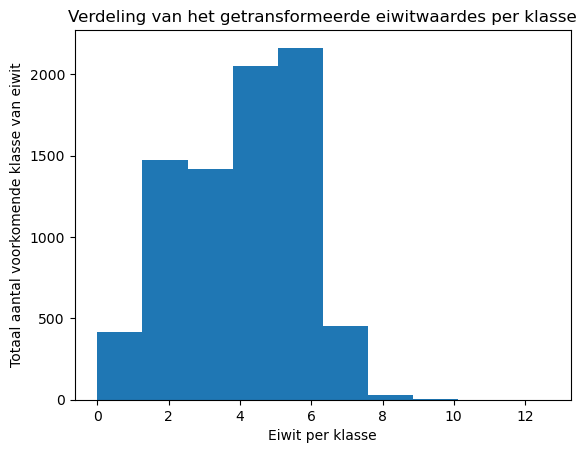

In [93]:
_ = plt.hist(df_train.eiwit)
_ = plt.title("Verdeling van het getransformeerde eiwitwaardes per klasse")
_ = plt.ylabel("Totaal aantal voorkomende klasse van eiwit")
_ = plt.xlabel("Eiwit per klasse")

In [94]:
df_train.isnull().sum()

nutrition
eiwit                   0
energie                 0
koolhydraten            0
natrium              1291
vet                     0
vezels                  0
waarvan suikers         0
waarvan verzadigd       0
dtype: int64

## Koolhydraten distribution

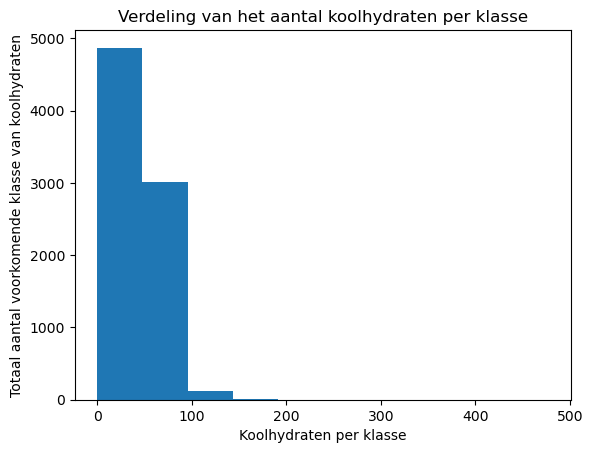

In [95]:
_ = plt.hist(df_train.koolhydraten)
_ = plt.title("Verdeling van het aantal koolhydraten per klasse")
_ = plt.ylabel("Totaal aantal voorkomende klasse van koolhydraten")
_ = plt.xlabel("Koolhydraten per klasse")

In [96]:
df_train.koolhydraten = np.log(df_train.koolhydraten[df_train.koolhydraten > 0])

In [97]:
df_train.isnull().sum()

nutrition
eiwit                   0
energie                 0
koolhydraten           54
natrium              1291
vet                     0
vezels                  0
waarvan suikers         0
waarvan verzadigd       0
dtype: int64

In [98]:
df_train['koolhydraten'] = df_train['koolhydraten'].fillna(0)

In [99]:
df_train.isnull().sum()

nutrition
eiwit                   0
energie                 0
koolhydraten            0
natrium              1291
vet                     0
vezels                  0
waarvan suikers         0
waarvan verzadigd       0
dtype: int64

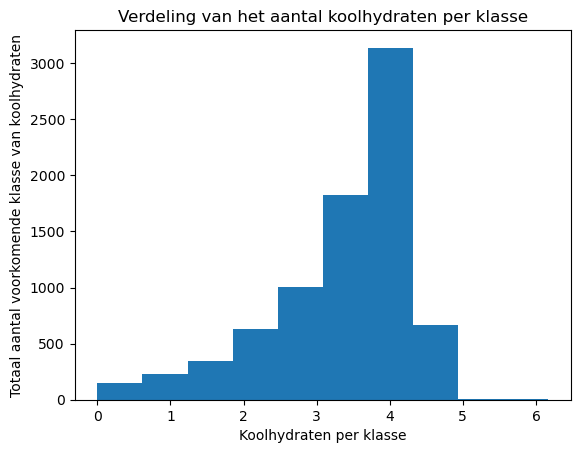

In [100]:
_ = plt.hist(df_train.koolhydraten)
_ = plt.title("Verdeling van het aantal koolhydraten per klasse")
_ = plt.ylabel("Totaal aantal voorkomende klasse van koolhydraten")
_ = plt.xlabel("Koolhydraten per klasse")

## Quick notice: 
I have to make sure that my data will later be transformed to its real values for evaluation!!

In [101]:
df_train

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
recipe,,,,,,,,
Andijviestamppot met gebakken salami,5.000000,25.099801,3.583519,1875.0,6.403124,7.0,0.0,17.0
Bietensoep met selderijroom,1.732051,12.649111,2.397895,1160.0,3.316625,5.0,0.0,5.0
Libanese wraps met appel-koolsalade,4.582576,20.976177,3.806662,440.0,4.242641,9.0,0.0,3.0
Plaattaart met gegrilde groenten en witte kaas,4.000000,23.452079,3.637586,760.0,5.916080,8.0,11.0,16.0
Sticky cauliflower (gegrilde bloemkoolroosjes) van Jord Althuizen,2.828427,15.329710,2.772589,800.0,3.741657,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...
Verse worst met knolselderijsalade,5.477226,22.360680,2.639057,800.0,5.830952,10.0,4.0,10.0
Verse-kabeljauw-couscousverrassing uit de oven,5.567764,18.574176,3.871201,120.0,5.567764,7.0,0.0,2.0
Vesper,0.000000,16.733201,0.693147,NaN,0.000000,0.0,0.0,0.0


# Model selection for predictive model

In [102]:
X = df_train[['eiwit', 'koolhydraten', 'vet']]
y = df_train['energie']
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.2)

In [103]:
def run_experiment(model, train_X, train_y, valid_X, valid_y):
    model.fit(train_X, train_y)
    y_pred = model.predict(valid_X)
    MSE = mse(valid_y,y_pred)
    RMSE = math.sqrt(mse(valid_y,y_pred))  
    R2 = r2_score(valid_y,y_pred)
    return model.__class__.__name__,MSE, RMSE, R2

In [104]:
X.isnull().sum()

nutrition
eiwit           0
koolhydraten    0
vet             0
dtype: int64

In [105]:
results = []
for m in [LinearRegression(), Ridge()]:
    r = run_experiment(m, train_X, train_y, valid_X, valid_y)
    results.append(r)

In [106]:
pd.DataFrame(results, columns=['model','MSE','RMSE','R2'])

,model,MSE,RMSE,R2
0,LinearRegression,2.236111,1.495363,0.935836
1,Ridge,2.236055,1.495344,0.935837


### Model Choice
Since I will use the R2 score metric, I will go with an Ridge for my predictive model. However this of course is not really that significantly worse or better than a Linear Regression

# Hyperparametertuning the model

In [107]:
import optuna

study = optuna.create_study(direction= 'maximize')


def trial(trial):
    alpha = trial.suggest_float("alpha", 0.001, 1.0, log = True)
    #for i in range(0, 21):
    train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.2)
    model = Ridge(alpha = alpha)
    model.fit(train_X, train_y)
    cvs = cross_val_score(model, train_X, train_y, cv=10, scoring = 'r2').mean()
    return cvs

study.optimize(trial, n_trials = 100)

optuna.visualization.plot_slice(study)

[I 2023-01-25 19:00:54,037] A new study created in memory with name: no-name-881e1359-5991-487a-abb3-1c506980bad4
[I 2023-01-25 19:00:54,107] Trial 0 finished with value: 0.939331622453588 and parameters: {'alpha': 0.011214308080419724}. Best is trial 0 with value: 0.939331622453588.
[I 2023-01-25 19:00:54,167] Trial 1 finished with value: 0.9401271091689573 and parameters: {'alpha': 0.7389777189596193}. Best is trial 1 with value: 0.9401271091689573.
[I 2023-01-25 19:00:54,224] Trial 2 finished with value: 0.9444870013711478 and parameters: {'alpha': 0.17687040333247217}. Best is trial 2 with value: 0.9444870013711478.
[I 2023-01-25 19:00:54,282] Trial 3 finished with value: 0.9431921056765059 and parameters: {'alpha': 0.019983484196863275}. Best is trial 2 with value: 0.9444870013711478.
[I 2023-01-25 19:00:54,338] Trial 4 finished with value: 0.938782852326311 and parameters: {'alpha': 0.001606785190545273}. Best is trial 2 with value: 0.9444870013711478.
[I 2023-01-25 19:00:54,397]

In [108]:
optuna.visualization.plot_slice(study)

### Choice of alpha parameter
I Think I will go for an alpha of 0.05, since the point are on averga higher on that point

# Prepair testset

In [109]:
df_test

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd,y_pred
recipe,,,,,,,,,
Vietnamese karamelzalm van Donal Skehan,34.0,490.0,24.0,680.0,28.0,3.0,0.0,4.0,NaN
Vietnamese komkommer,17.0,335.0,62.0,NaN,1.0,0.0,0.0,0.0,NaN
Vietnamese loempia's,6.0,160.0,15.0,320.0,8.0,1.0,3.0,2.0,NaN
Vietnamese loempia's met groente,10.0,500.0,38.0,NaN,33.0,0.0,0.0,0.0,NaN
Vietnamese noedelsalade met gemarineerde garnalen,22.0,475.0,33.0,580.0,27.0,6.0,0.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes met room,33.0,640.0,26.0,520.0,45.0,2.0,0.0,22.0,NaN
Zweedse vegaballetjes met aardappel &amp; broccoli,38.0,770.0,76.0,1320.0,31.0,17.0,0.0,10.0,NaN
Zwitserse kaasfondue,56.0,850.0,7.0,920.0,63.0,0.0,5.0,38.0,NaN


In [110]:
train_X

nutrition,eiwit,koolhydraten,vet
recipe,,,
Pittige Spaanse bonenstoof met braadworst en aubergine,6.633250,4.094345,6.557439
Pappardelle met ricotta en gepofte snoeptomaten,4.795832,4.382027,5.099020
Sushi-cake,3.872983,4.382027,3.464102
Bietencarpaccio,1.732051,2.079442,3.000000
"Kabeljauwfilet met mosselen, wortel en zeekraal",6.164414,2.302585,5.656854
...,...,...,...
Aspergepizza,4.898979,3.951244,4.000000
Rundervink met snijbonen en ovenaardappelen,5.291503,4.174387,5.000000
"Luxe bagel met roomkaas, biefstuk en paddenstoelen",5.567764,4.007333,5.477226


In [111]:
test_X = df_test[['eiwit', 'koolhydraten', 'vet']]
test_y = df_test['y_pred']

In [112]:
test_X['eiwit'] = np.sqrt(test_X['eiwit'])
test_X['vet'] = np.sqrt(test_X['vet'])
test_X['koolhydraten'] = np.log(test_X.koolhydraten[test_X.koolhydraten > 0])
test_X['koolhydraten'] = test_X['koolhydraten'].fillna(0)
test_X

nutrition,eiwit,koolhydraten,vet
recipe,,,
Vietnamese karamelzalm van Donal Skehan,5.830952,3.178054,5.291503
Vietnamese komkommer,4.123106,4.127134,1.000000
Vietnamese loempia's,2.449490,2.708050,2.828427
Vietnamese loempia's met groente,3.162278,3.637586,5.744563
Vietnamese noedelsalade met gemarineerde garnalen,4.690416,3.496508,5.196152
...,...,...,...
Zweedse gehaktballetjes met room,5.744563,3.258097,6.708204
Zweedse vegaballetjes met aardappel &amp; broccoli,6.164414,4.330733,5.567764
Zwitserse kaasfondue,7.483315,1.945910,7.937254


# Make a prediction using the ridge model

In [113]:
model = Ridge(alpha = 0.05)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

In [114]:
y_pred_good = y_pred**2

In [115]:
df_test['y_pred'] = y_pred_good
df_test

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd,y_pred
recipe,,,,,,,,,
Vietnamese karamelzalm van Donal Skehan,34.0,490.0,24.0,680.0,28.0,3.0,0.0,4.0,542.883119
Vietnamese komkommer,17.0,335.0,62.0,NaN,1.0,0.0,0.0,0.0,261.752467
Vietnamese loempia's,6.0,160.0,15.0,320.0,8.0,1.0,3.0,2.0,207.600411
Vietnamese loempia's met groente,10.0,500.0,38.0,NaN,33.0,0.0,0.0,0.0,510.387935
Vietnamese noedelsalade met gemarineerde garnalen,22.0,475.0,33.0,580.0,27.0,6.0,0.0,4.0,518.508381
...,...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes met room,33.0,640.0,26.0,520.0,45.0,2.0,0.0,22.0,673.718995
Zweedse vegaballetjes met aardappel &amp; broccoli,38.0,770.0,76.0,1320.0,31.0,17.0,0.0,10.0,723.430733
Zwitserse kaasfondue,56.0,850.0,7.0,920.0,63.0,0.0,5.0,38.0,714.212795


# Evaluation

In [116]:
r2_total = r2_score(df_test['energie'], df_test['y_pred'])
r2_total

0.9064710909031924

Eventually, the model semmed out te be a good model. With an r2_score of 0.91 (rounded) I think the model would be accurate enough to give a good prediction of the kcal in each meal